In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas import ExcelFile

In [3]:
df = pd.read_excel('APH Historical Data Tree.xlsx')
df2 = df['Price']
df2 = pd.DataFrame(df2)     
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,46800,46880,47120,46080,618.63K,-0.0017
1,2021-07-02,45600,46640,46800,45520,601.00K,-0.0256
2,2021-07-05,44240,45600,45760,43680,1.89M,-0.0298
3,2021-07-06,44160,44240,45040,44080,2.01M,-0.0018
4,2021-07-07,44160,44160,44800,43360,1.93M,0.0000


In [4]:
# Prediction 3 months into the future.
future_days = 58
df2['Prediction'] = df2['Price'].shift(-future_days)
df2.head()

,Price,Prediction
0,46800,35520.0
1,45600,35360.0
2,44240,33600.0
3,44160,33160.0
4,44160,32480.0


In [5]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
y = np.array(df2['Prediction'])[:-future_days]

C:\Users\DELL\AppData\Local\Temp\ipykernel_1860\2978037697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [7]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [8]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1860\3447370556.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


In [9]:
predictions = tree_prediction 
predictions_2 = lr_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DELL\AppData\Local\Temp\ipykernel_1860\212474267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


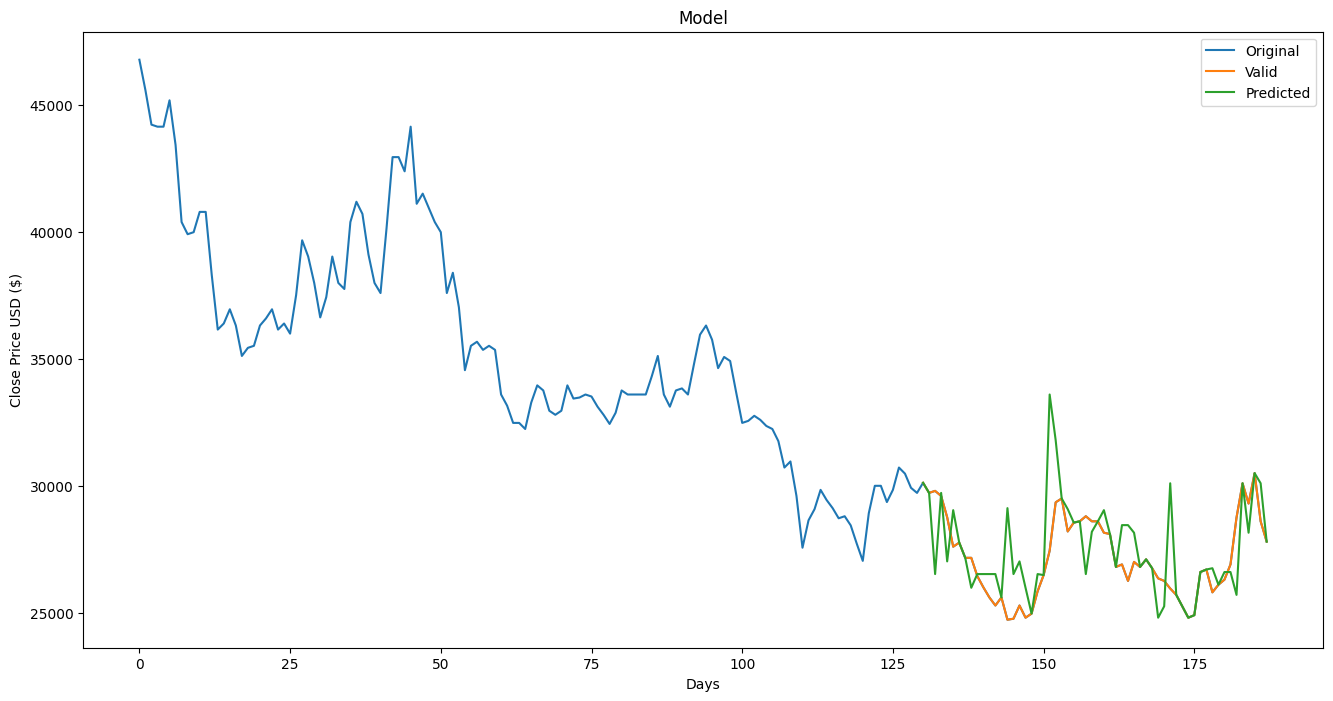

In [10]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()